This is an example of markdown in a cell.  Look in the toolbar for the dropdown that changes the properties of the cell.

# This is a big heading
## This is a smaller heading
### This is a smaller heading yet

1. Numbered list item 1
2. Numbered list item 2

* bullet list item 1
* bullet list item 2

*This is an italicized sentence.*
**Bolding works like so, with two stars.**

* **Bolded bullet list item 1**
* *Italic bullet list item 2*

`This is way to highlight code`

***

This is some important text with a horizontal rule.

***

<a href="url" target="_blank">hyperlinked words</a>


https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/ 

In [1]:
# Preparation Work, install these packages using the terminal.
# pip3 install mpmath
# pip3 install numpy
# pip3 install matplotlib



## Problem statement

A construction project involves three tasks:

    Task 1 is likely to take three days (70% probability), but it might also be completed in two days (with 10% probability) or four days (20% probability)

    Task 2 has a 60% probability of taking six days to finish, a 20% probability each of being completed in five days or eight days

    Task 3 has an 80% probability of being completed in four days, 5% probability of being completed in three days and a 15% probability of being completed in five days.

Each task is dependent on the task before it, meaning that the three tasks must be executed in sequence. Your task is to provide information to the project manager concerning the expected completion time of the project and possible delays.


In [2]:
# Calculate best and worst case scenario
from mpmath import iv

task1 = iv.mpf([2, 4])
task2 = iv.mpf([5, 8])
task3 = iv.mpf([3, 5])
task1 + task2 + task3

mpi('10.0', '17.0')

# Test out the function that generates estimates
In this version, we're creating a function that generates an estimate based on the type of distribution or other parameters according to the task.

In [3]:
import numpy
import matplotlib.pyplot as plt

plt.style.use("bmh")
%config InlineBackend.figure_formats=["svg"]

def task1_days() -> int:
    u = numpy.random.uniform()
    if u < 0.7: return 3
    if u < 0.8: return 2
    return 4

In [4]:
task1_days()

3

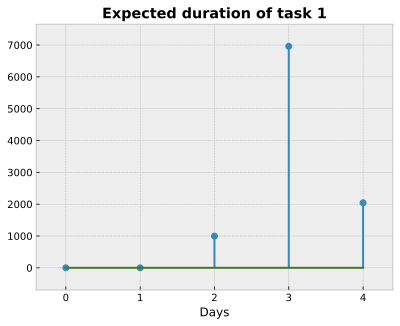

In [5]:
N = 10000
sim = numpy.zeros(N, dtype=int)
for i in range(N):
    sim[i] = task1_days()

    
plt.stem(numpy.bincount(sim))
plt.title("Expected duration of task 1", weight="bold")
plt.xlabel("Days")
plt.margins(0.1)

In [6]:
def task2_days() -> int:
    u = numpy.random.uniform()
    if u < 0.6: return 6
    if u < 0.8: return 5
    return 8

def task3_days() -> int:
    u = numpy.random.uniform()
    if u < 0.8: return 4
    if u < 0.85: return 3
    return 5

In [7]:
def project_duration() -> int:
    return task1_days() + task2_days() + task3_days()

Worst case: 17 days
Best case: 10 days
Median: 13.0 days


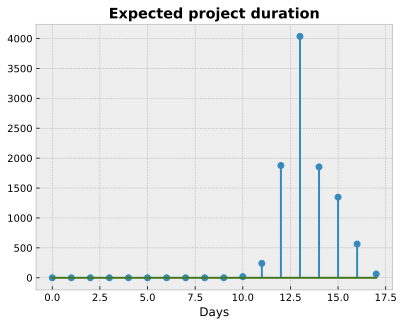

In [8]:
N = 10_000
sim = numpy.zeros(N, dtype=int)
for i in range(N):
    sim[i] = project_duration()

    
plt.stem(numpy.bincount(sim))
plt.title("Expected project duration", weight="bold")
plt.xlabel("Days");
print("Worst case: {} days".format(sim.max()))
print("Best case: {} days".format(sim.min()))
print("Median: {} days".format(numpy.median(sim)))

## At what estimate are we 95% confident?

To calculate the schedule duration that we're 95% confident we will achieve, use the percentile function with a 95th percentile argument.

In [9]:
numpy.percentile(sim, 95)

16.0

## Parallel Tasks
For parallel tasks, we have to take the maximum of the set that runs in parallel.  Say that task 2 and 3 run in parallel instead of sequentially.  In this case, we have to simulate task 2 and 3 separately and take the max() of those.  See the model below.

In [10]:
def project_duration() -> int:
    return task1_days() + max(task2_days(), task3_days())

## Correlated Risks
Let's assume that there is a risk of some delay that's independent from the tasks being modeled.  This simplified model (listed below) adds the delay to the duration of each of the three tasks.

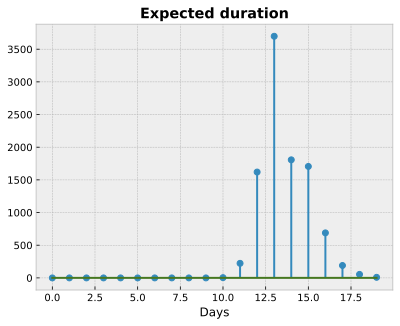

In [11]:
def project_duration() -> int:
    delay = 0
    if numpy.random.uniform() < 0.1:
        delay = 2
    return task1_days() + task2_days() + task3_days() + delay

N = 10_000
sim = numpy.zeros(N, dtype=int)
for i in range(N):
    sim[i] = project_duration()

plt.stem(numpy.bincount(sim))
plt.title("Expected duration", weight="bold")
plt.xlabel("Days");

# Different Distributions
https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html


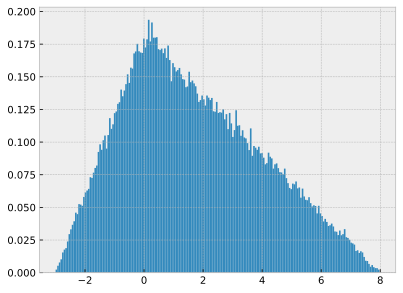

In [12]:
h = plt.hist(numpy.random.triangular(-3, 0, 8, 100000), bins=200, density=True)

plt.show()

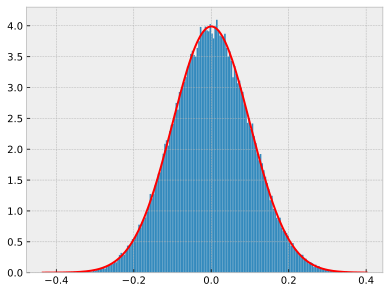

In [13]:
mu, sigma = 0, 0.1 # mean and standard deviation

s1 = numpy.random.normal(mu, sigma, 100000)

count, bins, ignored = plt.hist(s1, 200, density=True)

plt.plot(bins, 1/(sigma * numpy.sqrt(2 * numpy.pi)) *
    numpy.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    linewidth=2, color='r')

plt.show()

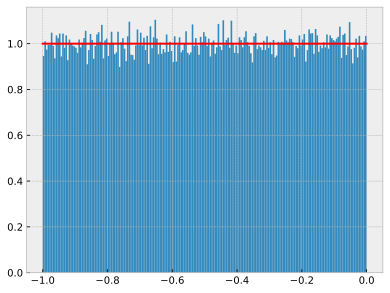

In [14]:
s2 = numpy.random.uniform(-1,0,100000)

count, bins, ignored = plt.hist(s2, 200, density=True)

plt.plot(bins, numpy.ones_like(bins), linewidth=2, color='r')

plt.show()